In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

In [2]:
#OID_,Id,gridcode,Shape_Length,Shape_Area,CH_mean,ARVI_mean,ARVI_med,ARVI_max,EVI_mean,EVI_med,EVI_max,NDVI_mean,NDVI_med,NDVI_max,SAVI_mean,SAVI_med,SAVI_max,Veg_class

# CH - Canopy Height (meters)
# ARVI - atmospherically resistant vegetation index
# EVI - enhanced vegetation index
# NDVI - normalized difference vegetation index
# SAVI - soil-adjusted vegetation index
# Veg_class - vegetation classification

In [3]:
data = pd.read_csv("SRER21_dataset_v1.csv")
data.head()

,OID_,Id,gridcode,Shape_Length,Shape_Area,CH_mean,ARVI_mean,ARVI_med,ARVI_max,EVI_mean,EVI_med,EVI_max,NDVI_mean,NDVI_med,NDVI_max,SAVI_mean,SAVI_med,SAVI_max,Veg_class
0,2,2,2,20.4,2.38,1.000000,0.273945,0.273945,0.273945,0.323257,0.323257,0.323257,0.428208,0.428208,0.428208,0.311936,0.311936,0.311936,woody
1,3,3,3,8.2,1.32,1.000000,0.530157,0.530157,0.530157,0.460513,0.460513,0.460513,0.611745,0.611745,0.611745,0.416492,0.416492,0.416492,woody
2,4,4,4,55.8,24.43,0.920000,0.477979,0.501013,0.616707,0.381095,0.384718,0.447304,0.576437,0.596638,0.673767,0.359786,0.364317,0.414173,woody
3,5,5,5,15.2,1.88,1.000000,0.342944,0.342944,0.342944,0.346714,0.346714,0.346714,0.468738,0.468738,0.468738,0.323907,0.323907,0.323907,woody
4,6,6,6,27.2,9.29,0.142857,0.044382,-0.008903,0.265536,0.181714,0.147391,0.315684,0.223522,0.178629,0.412030,0.177739,0.147325,0.299311,non-woody


In [4]:
#dropping the null values
data.isnull().sum()
data.dropna(axis=0,inplace=True)

In [5]:
#making sure that there are no null values
data.isnull().sum()

OID_            0
Id              0
gridcode        0
Shape_Length    0
Shape_Area      0
CH_mean         0
ARVI_mean       0
ARVI_med        0
ARVI_max        0
EVI_mean        0
EVI_med         0
EVI_max         0
NDVI_mean       0
NDVI_med        0
NDVI_max        0
SAVI_mean       0
SAVI_med        0
SAVI_max        0
Veg_class       0
dtype: int64

In [6]:
#information on the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6805 entries, 0 to 7765
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OID_          6805 non-null   int64  
 1   Id            6805 non-null   int64  
 2   gridcode      6805 non-null   int64  
 3   Shape_Length  6805 non-null   float64
 4   Shape_Area    6805 non-null   float64
 5   CH_mean       6805 non-null   float64
 6   ARVI_mean     6805 non-null   float64
 7   ARVI_med      6805 non-null   float64
 8   ARVI_max      6805 non-null   float64
 9   EVI_mean      6805 non-null   float64
 10  EVI_med       6805 non-null   float64
 11  EVI_max       6805 non-null   float64
 12  NDVI_mean     6805 non-null   float64
 13  NDVI_med      6805 non-null   float64
 14  NDVI_max      6805 non-null   float64
 15  SAVI_mean     6805 non-null   float64
 16  SAVI_med      6805 non-null   float64
 17  SAVI_max      6805 non-null   float64
 18  Veg_class     6805 non-null 

In [7]:
print(data.shape)

(6805, 19)


In [8]:
#looking for any strange symbols
for col in data.columns:
    print('{} : {}'.format(col,data[col].unique()))

OID_ : [   2    3    4 ... 7763 7766 7767]
Id : [   2    3    4 ... 7763 7766 7767]
gridcode : [   2    3    4 ... 7763 7766 7767]
Shape_Length : [ 20.4          8.2         55.80000002 ...  21.00000001 168.80000001
  16.20000001]
Shape_Area : [ 2.38  1.32 24.43 ...  2.24  3.62  3.15]
CH_mean : [1.0000000e+00 9.2000000e-01 1.4285710e-01 8.0952380e-01 0.0000000e+00
 3.3333330e-01 5.0000000e-01 2.5000000e-01 8.0000000e-01 7.5000000e-01
 2.0000000e-01 8.5000000e-01 7.0000000e-01 1.2765960e-01 6.6666670e-01
 8.5714290e-01 1.3333330e-01 8.1818180e-01 1.6666670e-01 6.9767440e-01
 8.3333330e-01 4.0000000e-01 7.7777780e-01 7.8947370e-01 6.0000000e-01
 7.1428570e-01 5.3333340e-01 7.6923080e-01 4.2857140e-01 9.3333330e-01
 9.4444440e-01 8.3333300e-02 2.3333330e-01 2.2222220e-01 1.1764710e-01
 8.6956520e-01 1.0689656e+00 9.0909100e-02 8.8888890e-01 9.2307690e-01
 3.5294120e-01 8.2352940e-01 2.8571430e-01 4.4444440e-01 8.8000000e-01
 2.6666670e-01 5.7142900e-02 1.1111110e-01 9.6153840e-01 1.818182

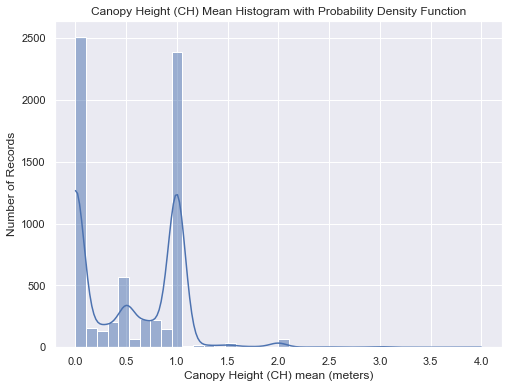

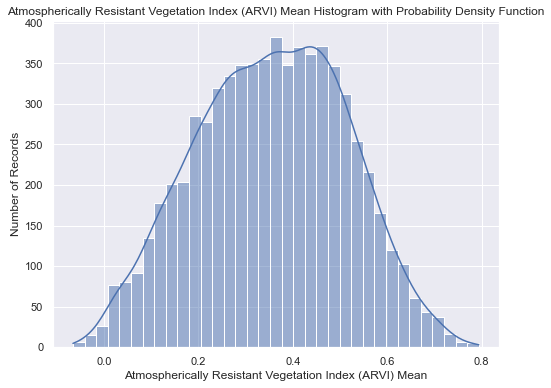

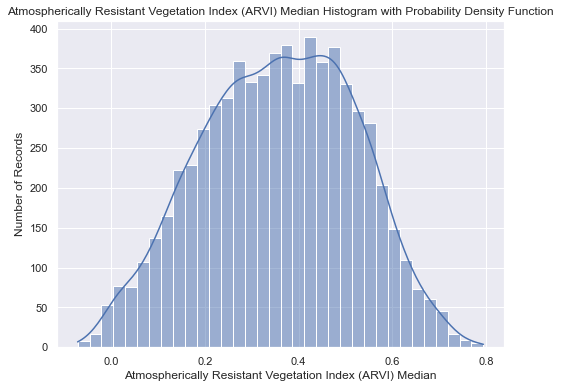

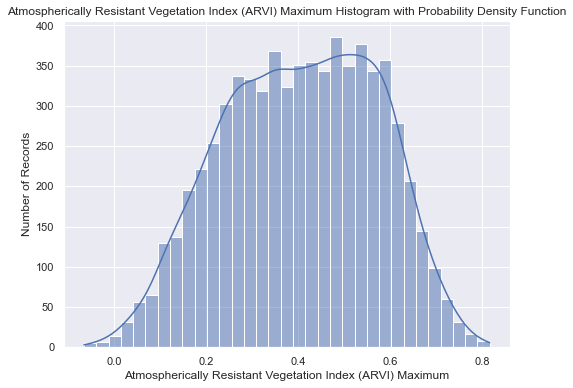

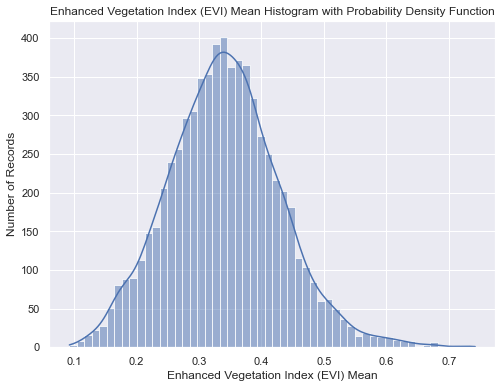

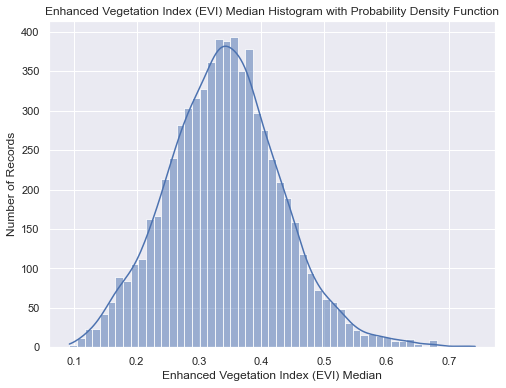

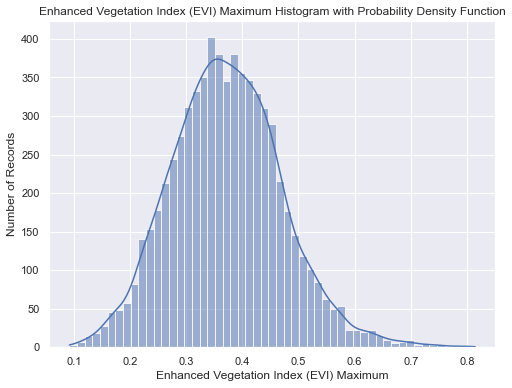

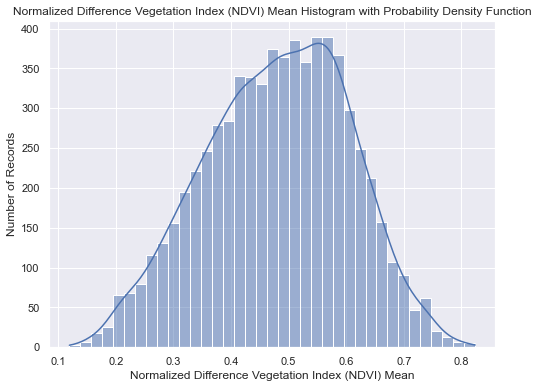

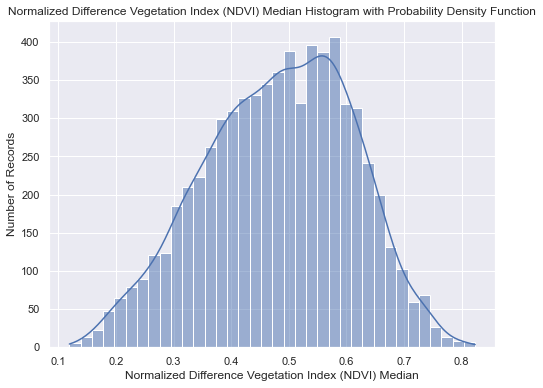

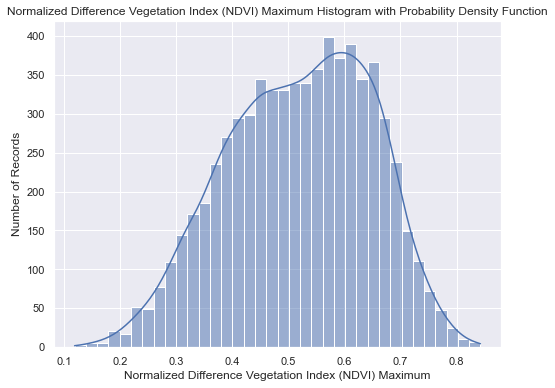

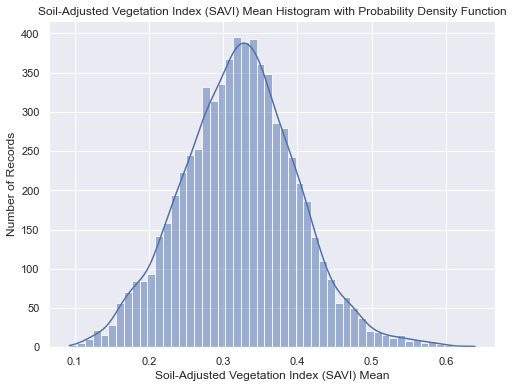

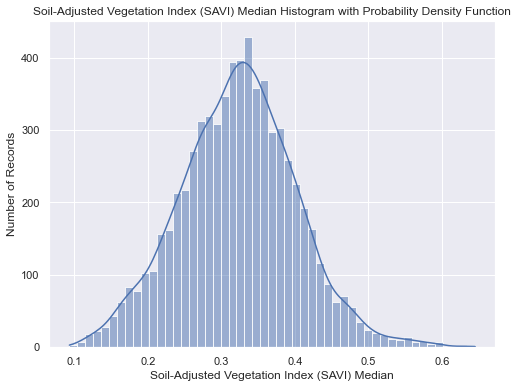

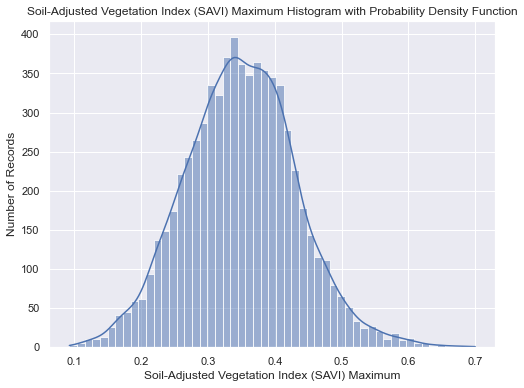

In [9]:
category = ["CH_mean","ARVI_mean","ARVI_med","ARVI_max","EVI_mean","EVI_med","EVI_max","NDVI_mean","NDVI_med","NDVI_max","SAVI_mean","SAVI_med","SAVI_max"]

for i in category:
    sns.set(rc={"figure.figsize":(15,8)})
    plt.figure(figsize=(8,6))
    sns.histplot(x=i,data=data,kde=True)
    plt.ylabel("Number of Records")
    if i == "CH_mean":
        plt.title("Canopy Height (CH) Mean Histogram with Probability Density Function")
        plt.xlabel("Canopy Height (CH) mean (meters)")
    if i == "ARVI_mean":
        plt.title("Atmospherically Resistant Vegetation Index (ARVI) Mean Histogram with Probability Density Function")
        plt.xlabel("Atmospherically Resistant Vegetation Index (ARVI) Mean")
    if i == "ARVI_med":
        plt.title("Atmospherically Resistant Vegetation Index (ARVI) Median Histogram with Probability Density Function")
        plt.xlabel("Atmospherically Resistant Vegetation Index (ARVI) Median")
    if i == "ARVI_max":
        plt.title("Atmospherically Resistant Vegetation Index (ARVI) Maximum Histogram with Probability Density Function")
        plt.xlabel("Atmospherically Resistant Vegetation Index (ARVI) Maximum")
    if i == "EVI_mean":
        plt.title("Enhanced Vegetation Index (EVI) Mean Histogram with Probability Density Function")
        plt.xlabel("Enhanced Vegetation Index (EVI) Mean")
    if i == "EVI_med":
        plt.title("Enhanced Vegetation Index (EVI) Median Histogram with Probability Density Function")
        plt.xlabel("Enhanced Vegetation Index (EVI) Median")
    if i == "EVI_max":
        plt.title("Enhanced Vegetation Index (EVI) Maximum Histogram with Probability Density Function")
        plt.xlabel("Enhanced Vegetation Index (EVI) Maximum")
    if i == "NDVI_mean":
        plt.title("Normalized Difference Vegetation Index (NDVI) Mean Histogram with Probability Density Function")
        plt.xlabel("Normalized Difference Vegetation Index (NDVI) Mean")
    if i == "NDVI_med":
        plt.title("Normalized Difference Vegetation Index (NDVI) Median Histogram with Probability Density Function")
        plt.xlabel("Normalized Difference Vegetation Index (NDVI) Median")
    if i == "NDVI_max":
        plt.title("Normalized Difference Vegetation Index (NDVI) Maximum Histogram with Probability Density Function")
        plt.xlabel("Normalized Difference Vegetation Index (NDVI) Maximum")
    if i == "SAVI_mean":
        plt.title("Soil-Adjusted Vegetation Index (SAVI) Mean Histogram with Probability Density Function")
        plt.xlabel("Soil-Adjusted Vegetation Index (SAVI) Mean")
    if i == "SAVI_med":
        plt.title("Soil-Adjusted Vegetation Index (SAVI) Median Histogram with Probability Density Function")
        plt.xlabel("Soil-Adjusted Vegetation Index (SAVI) Median")
    if i == "SAVI_max":
        plt.title("Soil-Adjusted Vegetation Index (SAVI) Maximum Histogram with Probability Density Function")
        plt.xlabel("Soil-Adjusted Vegetation Index (SAVI) Maximum")
        


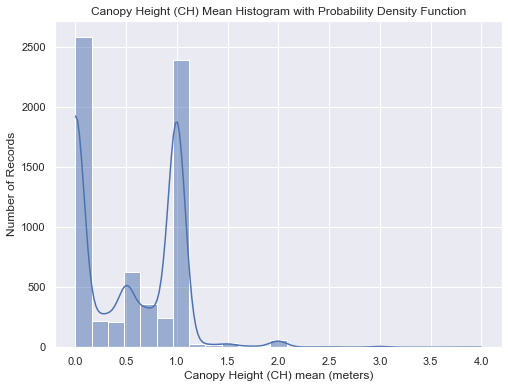

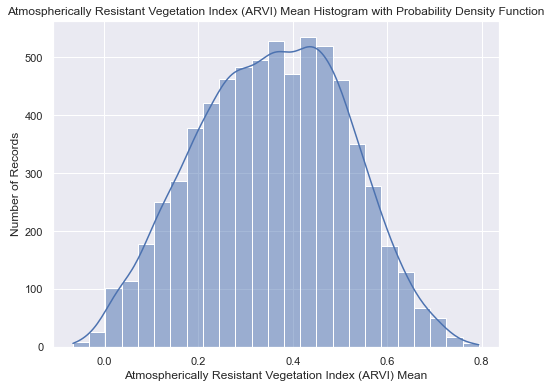

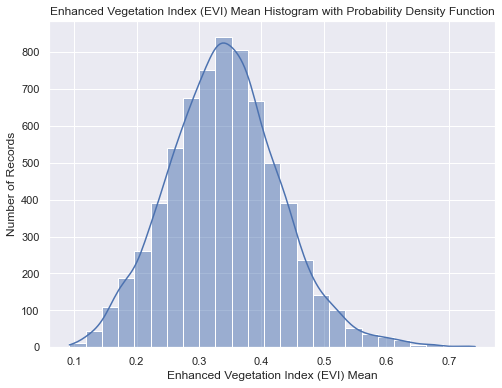

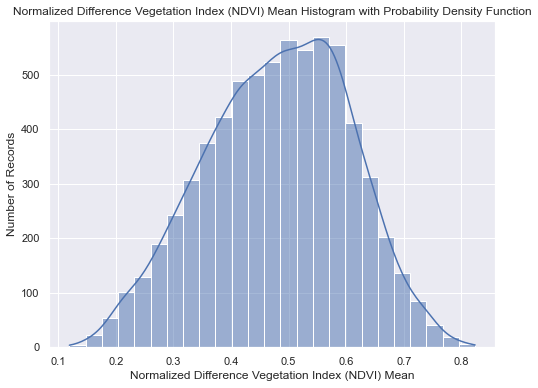

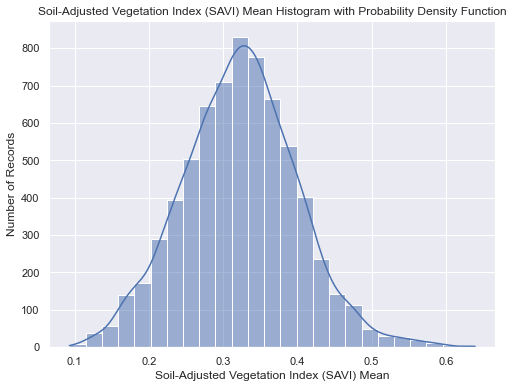

In [10]:
#histogram of means with a "line of best fit"
category = ["CH_mean","ARVI_mean","EVI_mean","NDVI_mean","SAVI_mean"]

for i in category:
    sns.set(rc={"figure.figsize":(15,8)})
    plt.figure(figsize=(8,6))
    sns.histplot(x=i,data=data,kde=True, bins = 25)
    plt.ylabel("Number of Records")
    if i == "CH_mean":
        plt.title("Canopy Height (CH) Mean Histogram with Probability Density Function")
        plt.xlabel("Canopy Height (CH) mean (meters)")
    if i == "ARVI_mean":
        plt.title("Atmospherically Resistant Vegetation Index (ARVI) Mean Histogram with Probability Density Function")
        plt.xlabel("Atmospherically Resistant Vegetation Index (ARVI) Mean")
    if i == "EVI_mean":
        plt.title("Enhanced Vegetation Index (EVI) Mean Histogram with Probability Density Function")
        plt.xlabel("Enhanced Vegetation Index (EVI) Mean")
    if i == "NDVI_mean":
        plt.title("Normalized Difference Vegetation Index (NDVI) Mean Histogram with Probability Density Function")
        plt.xlabel("Normalized Difference Vegetation Index (NDVI) Mean")
    if i == "SAVI_mean":
        plt.title("Soil-Adjusted Vegetation Index (SAVI) Mean Histogram with Probability Density Function")
        plt.xlabel("Soil-Adjusted Vegetation Index (SAVI) Mean")

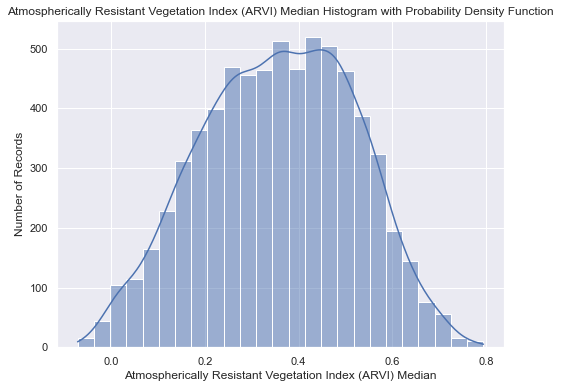

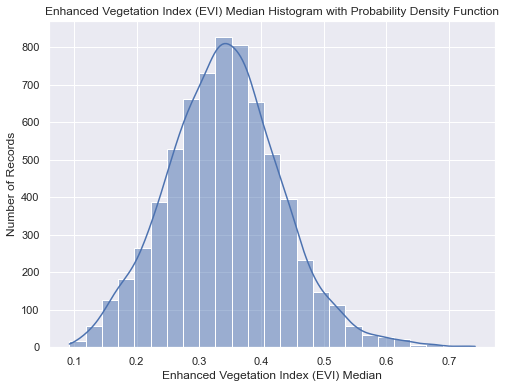

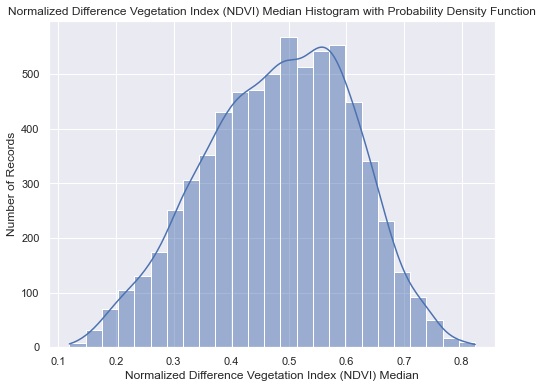

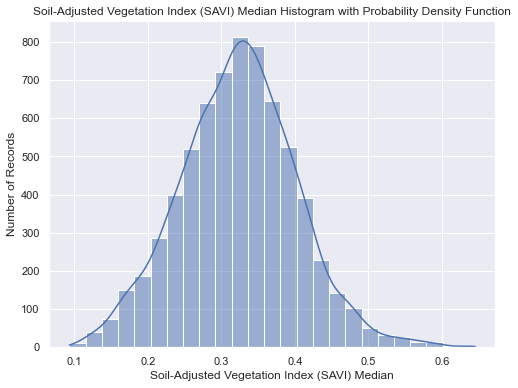

In [11]:
#histogram of medians with a "line of best fit"

category = ["ARVI_med","EVI_med","NDVI_med","SAVI_med"]
for i in category:
    sns.set(rc={"figure.figsize":(15,8)})
    plt.figure(figsize=(8,6))
    sns.histplot(x=i,data=data,kde=True, bins = 25)
    plt.ylabel("Number of Records")
    if i == "ARVI_med":
        plt.title("Atmospherically Resistant Vegetation Index (ARVI) Median Histogram with Probability Density Function")
        plt.xlabel("Atmospherically Resistant Vegetation Index (ARVI) Median")
    if i == "EVI_med":
        plt.title("Enhanced Vegetation Index (EVI) Median Histogram with Probability Density Function")
        plt.xlabel("Enhanced Vegetation Index (EVI) Median")
    if i == "NDVI_med":
        plt.title("Normalized Difference Vegetation Index (NDVI) Median Histogram with Probability Density Function")
        plt.xlabel("Normalized Difference Vegetation Index (NDVI) Median")
    if i == "SAVI_med":
        plt.title("Soil-Adjusted Vegetation Index (SAVI) Median Histogram with Probability Density Function")
        plt.xlabel("Soil-Adjusted Vegetation Index (SAVI) Median")
    

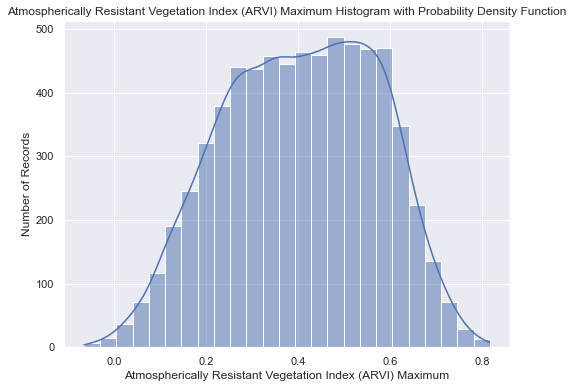

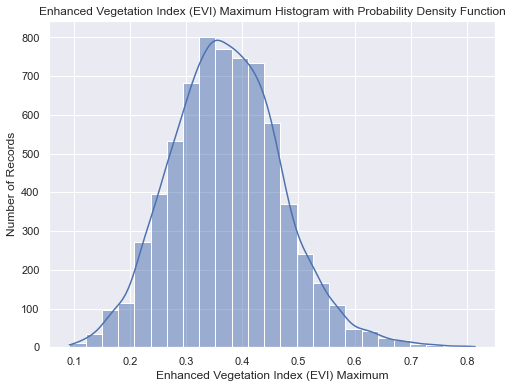

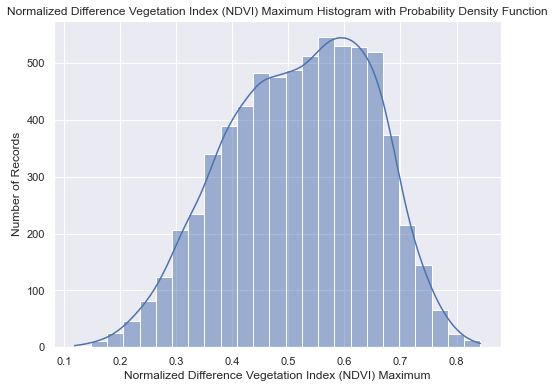

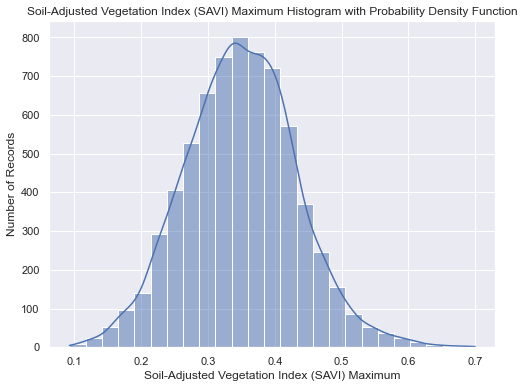

In [12]:
#histogram of maximums with a "line of best fit"

category = ["ARVI_max","EVI_max","NDVI_max","SAVI_max"]
for i in category:
    sns.set(rc={"figure.figsize":(15,8)})
    plt.figure(figsize=(8,6))
    sns.histplot(x=i,data=data,kde=True, bins = 25)
    plt.ylabel("Number of Records")
    if i == "ARVI_max":
        plt.title("Atmospherically Resistant Vegetation Index (ARVI) Maximum Histogram with Probability Density Function")
        plt.xlabel("Atmospherically Resistant Vegetation Index (ARVI) Maximum")
    if i == "EVI_max":
        plt.title("Enhanced Vegetation Index (EVI) Maximum Histogram with Probability Density Function")
        plt.xlabel("Enhanced Vegetation Index (EVI) Maximum")
    if i == "NDVI_max":
        plt.title("Normalized Difference Vegetation Index (NDVI) Maximum Histogram with Probability Density Function")
        plt.xlabel("Normalized Difference Vegetation Index (NDVI) Maximum")
    if i == "SAVI_max":
        plt.title("Soil-Adjusted Vegetation Index (SAVI) Maximum Histogram with Probability Density Function")
        plt.xlabel("Soil-Adjusted Vegetation Index (SAVI) Maximum")

Text(0.5, 0, 'Vegetation Class')

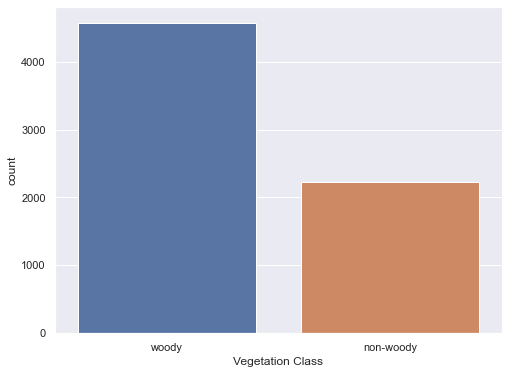

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(x=data["Veg_class"])
plt.xlabel("Vegetation Class")

<AxesSubplot:>

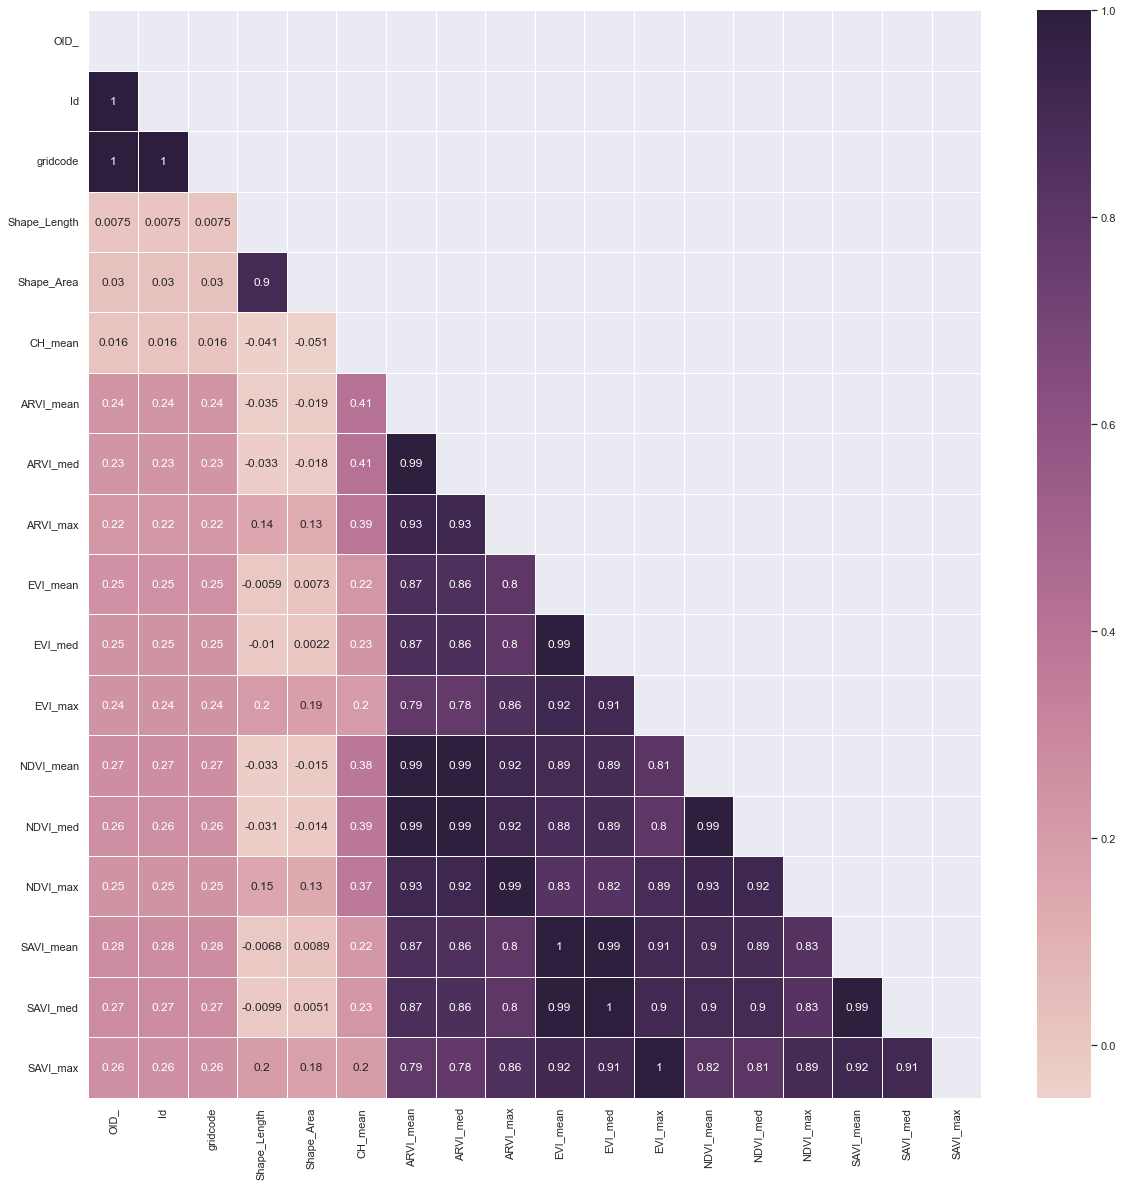

In [27]:
#heatmap of the figure --> this shows some cool stuff

mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
colorpurple = sns.cubehelix_palette(as_cmap=True)
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),cbar=True,annot=True,cmap = color, linewidths=.5,mask=mask)

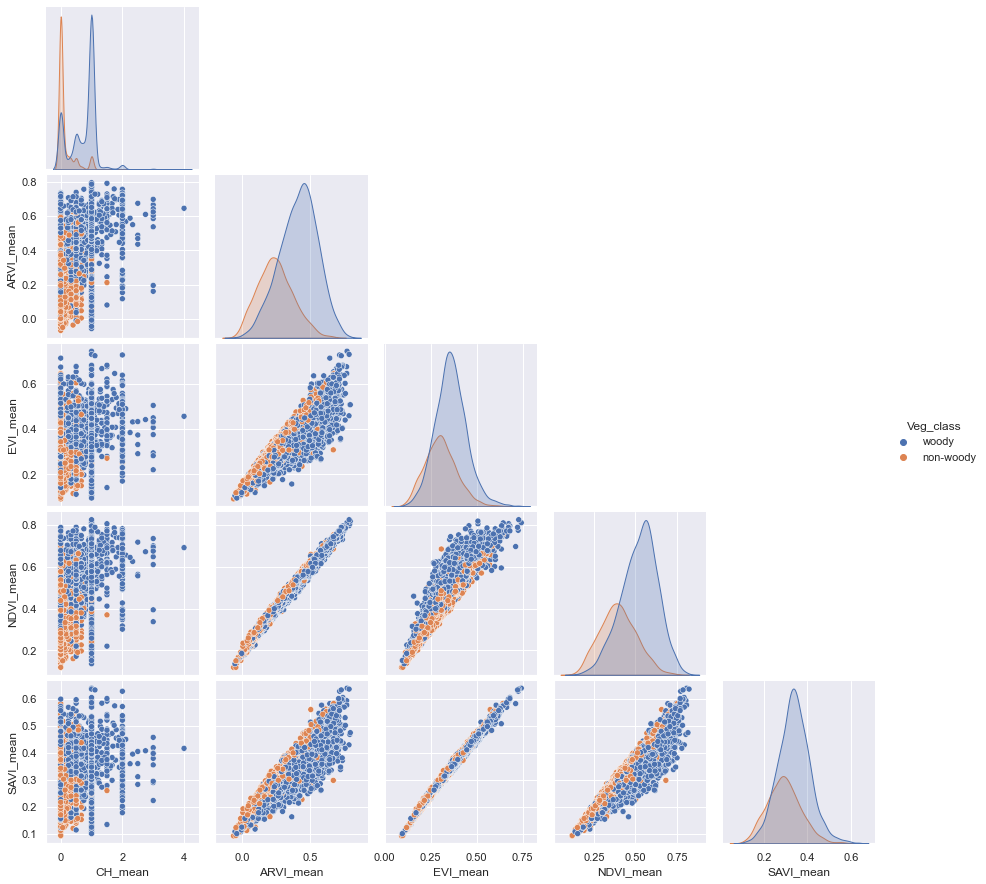

In [15]:
#All mean variable pairplot
me = sns.pairplot(data, hue="Veg_class", x_vars = ["CH_mean","ARVI_mean","EVI_mean","NDVI_mean","SAVI_mean"], y_vars = ["CH_mean","ARVI_mean","EVI_mean","NDVI_mean","SAVI_mean"],corner=True)

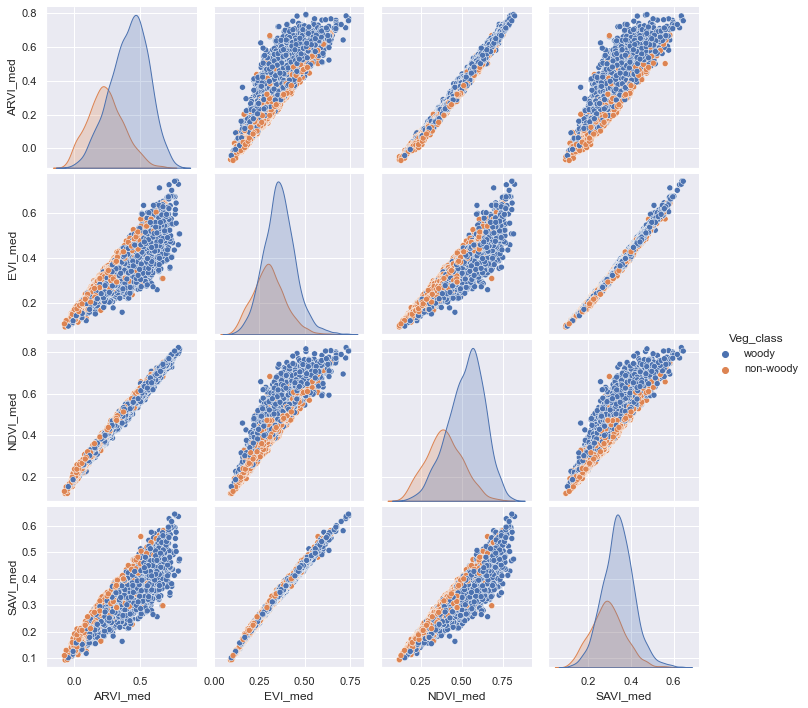

In [16]:
med = sns.pairplot(data, hue="Veg_class", x_vars = ["ARVI_med","EVI_med","NDVI_med","SAVI_med"], y_vars = ["ARVI_med","EVI_med","NDVI_med","SAVI_med"])

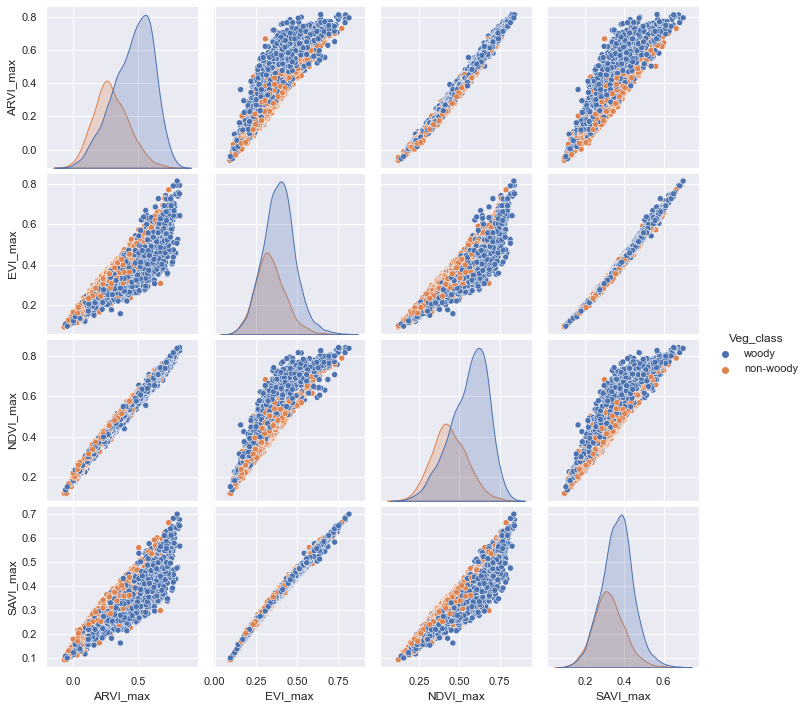

In [17]:
ma= sns.pairplot(data, hue="Veg_class", x_vars = ["ARVI_max","EVI_max","NDVI_max","SAVI_max"], y_vars = ["ARVI_max","EVI_max","NDVI_max","SAVI_max"])

In [18]:
data['CH_mean'].mean()

0.53206474286554

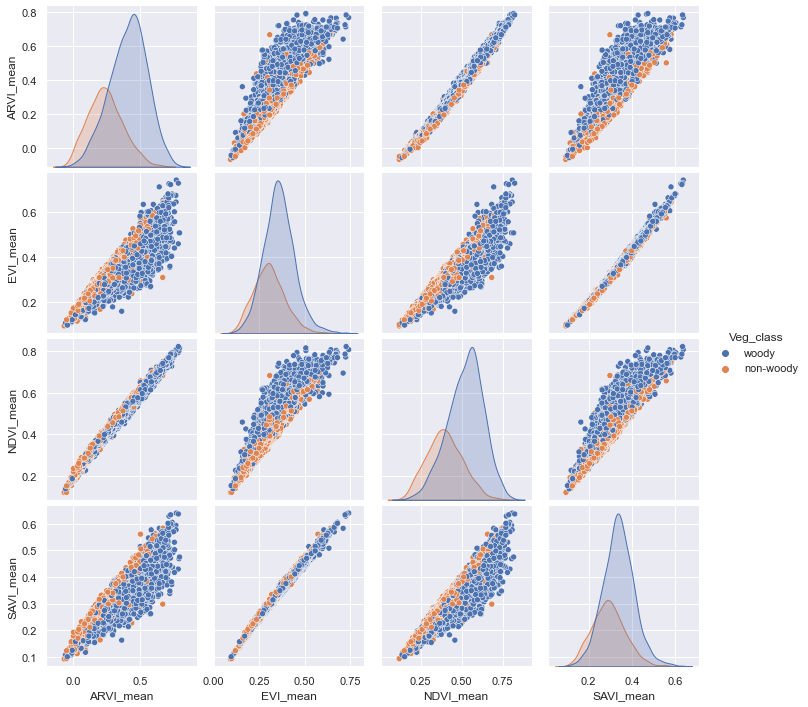

In [19]:
mewch = sns.pairplot(data, hue="Veg_class", x_vars = ["ARVI_mean","EVI_mean","NDVI_mean","SAVI_mean"], y_vars = ["ARVI_mean","EVI_mean","NDVI_mean","SAVI_mean"])

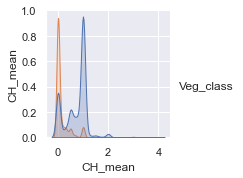

In [20]:
med = sns.pairplot(data, hue="Veg_class", x_vars = "CH_mean", y_vars = "CH_mean")

<AxesSubplot:>

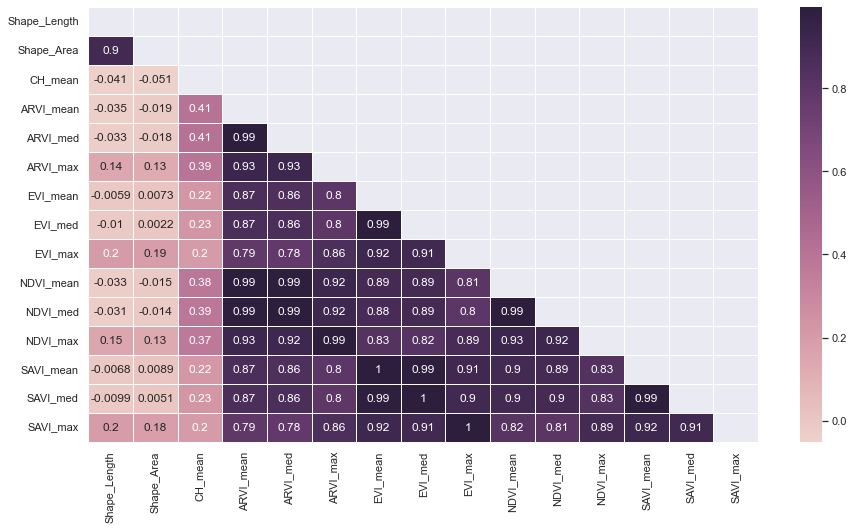

In [34]:
#heatmap of the figure --> this shows some cool stuff

sampledatav2 = pd.read_csv("SRER21_dataset_v1.csv")
sampledatav2.rename({"OID_":"a"}, axis="columns", inplace=True)
sampledatav2.drop(["a"], axis=1, inplace=True)
sampledatav2.rename({"Id":"b"}, axis="columns", inplace=True)
sampledatav2.drop(["b"], axis=1, inplace=True)
sampledatav2.rename({"gridcode":"c"}, axis="columns", inplace=True)
sampledatav2.drop(["c"], axis=1, inplace=True)

mask = np.zeros_like(sampledatav2.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(sampledatav2.corr(),cbar=True,annot=True,cmap = colorpurple, linewidths=.5,mask=mask)

<AxesSubplot:>

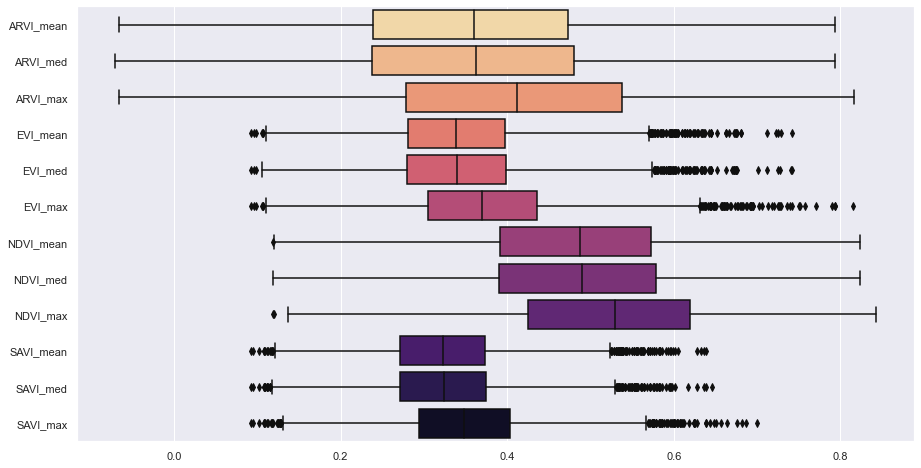

In [32]:
sampledatav3 = pd.read_csv("SRER21_dataset_v1.csv")
sampledatav3.rename({"OID_":"a"}, axis="columns", inplace=True)
sampledatav3.drop(["a"], axis=1, inplace=True)
sampledatav3.rename({"Id":"b"}, axis="columns", inplace=True)
sampledatav3.drop(["b"], axis=1, inplace=True)
sampledatav3.rename({"gridcode":"c"}, axis="columns", inplace=True)
sampledatav3.drop(["c"], axis=1, inplace=True)
sampledatav3.rename({"Shape_Length":"d"}, axis="columns", inplace=True)
sampledatav3.drop(["d"], axis=1, inplace=True)
sampledatav3.rename({"Shape_Area":"e"}, axis="columns", inplace=True)
sampledatav3.drop(["e"], axis=1, inplace=True)
sampledatav3.rename({"CH_mean":"f"}, axis="columns", inplace=True)
sampledatav3.drop(["f"], axis=1, inplace=True)

sns.boxplot(data=sampledatav3, orient="h", palette="magma_r")